# Online Retail EDA and Marketing KPIs 

In this notebook, we will be examining two years of sales data of a fictional online retailer based out of the UK. This retailer deals primarily in sales to distributers in large quantities, resulting in high value individual transactions. The company sells products consisting of multiple different categories, such as clothing, electronics, and books, among others. To view more information related to this dataset, view the <a href="https://www.kaggle.com/datasets/ronnykym/online-store-sales-data?resource=download" target="_blank">Kaggle dataset</a>.

This analysis starts with examing the data and performing data cleaning/validation to ensure the validity of the data. We will then perform exploratory analysis to examine sales trends by different categorical datatypes and over time. We will end by generating a marketing report to examine various different marketing metrics and evaluate the success of marketing operations.

## Table of Contents
1. [Load and Examine Data](#examine-data)
2. [Data Cleaning and Validation](#cleaning-validation)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Calculating Marketing Metrics and KPIs](#marketing-metrics)

<a name="examine-data"><a/>

## Load and Examine Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Read csv file
df = pd.read_csv("Sales-Export_2019-2020.csv")

In [3]:
# View dataframe
df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
...,...,...,...,...,...,...,...,...,...,...
995,France,"46,296.26",40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
996,Belgium,"118,061.05",101131.10,7/2/2020,Appliances,Johns and Sons,Lambert Norheny,Collin Mackness,Mobile,59-2117058
997,Finland,"74,480.56",60023.88,3/6/2020,Clothing,Homenick-Marvin,Hube Corey,Wat Bowkley,PC,31-1849120
998,Spain,"87,205.01",69171.01,6/18/2020,Games,Johns and Sons,Emalia Dinse,Manuel Goudie,Tablet,45-3085595


In [4]:
# View dataframe column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


We can see that some of the columns appear to have extra white spaces, which will be removed. Additionally, we will casefold all column titles for constency. Additionally, order_value_EUR is currently an object datatype, but this should be a float.

We also have a date column stored as an object datatype, which will be converted to a datetime format.

<a name="cleaning-validation"><a/>

## Data Cleaning and Validation

In [5]:
# We can see that there are extra spaces in column titles
df.columns.tolist()

['country',
 ' order_value_EUR ',
 ' cost ',
 'date',
 'category',
 'customer_name',
 'sales_manager',
 'sales_rep',
 'device_type',
 'order_id']

In [6]:
# Strip white spaces and make all columns lowercase for consistency
df.columns = df.columns.str.strip().str.lower()

In [7]:
# White spaces are removed and values are lowercase
df.columns.tolist()

['country',
 'order_value_eur',
 'cost',
 'date',
 'category',
 'customer_name',
 'sales_manager',
 'sales_rep',
 'device_type',
 'order_id']

In [8]:
df["order_value_eur"]

0       17,524.02
1      116,563.40
2      296,465.56
3       74,532.02
4      178,763.42
          ...    
995     46,296.26
996    118,061.05
997     74,480.56
998     87,205.01
999    107,716.72
Name: order_value_eur, Length: 1000, dtype: object

We can see that commas are included in the values, causing python to interpret these values as strings. These values will be stripped.

In [9]:
# Remove comma and cast as float
df["order_value_eur"] = df["order_value_eur"].str.replace(",", "").astype("float64")

In [10]:
# Rename column to revenue
df = df.rename(columns={"order_value_eur": "revenue"})

In [11]:
df["revenue"]

0       17524.02
1      116563.40
2      296465.56
3       74532.02
4      178763.42
         ...    
995     46296.26
996    118061.05
997     74480.56
998     87205.01
999    107716.72
Name: revenue, Length: 1000, dtype: float64

In [12]:
# View date column
df["date"]

0       2/12/2020
1       9/26/2019
2       7/11/2019
3        4/2/2020
4      12/22/2019
          ...    
995     5/15/2020
996      7/2/2020
997      3/6/2020
998     6/18/2020
999     1/18/2020
Name: date, Length: 1000, dtype: object

In [13]:
# Split apart date parts
df["date_parts"] = df["date"].str.split("/")

# Create columns for each part, left padding month and day to include a 0 if date is one digit
df["month"] = df["date_parts"].str[0].str.zfill(2)
df["day"] = df["date_parts"].str[1].str.zfill(2)
df["year"] = df["date_parts"].str[2]

# Create column order_date as new date column is ISO8601 format
df["order_date"] = pd.to_datetime((df["year"] + "-" + df["month"] + "-" + df["day"]), format="ISO8601")

# Drop other date columns
df.drop(["month", "day", "year", "date_parts", "date"], axis=1, inplace=True)

In [14]:
# Dates properly updated
df.head()

,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type,order_id,order_date
0,Sweden,17524.02,14122.61,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,2020-02-12
1,Finland,116563.40,92807.78,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2019-09-26
2,Portugal,296465.56,257480.34,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,2019-07-11
3,Portugal,74532.02,59752.32,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,2020-04-02
4,Spain,178763.42,146621.76,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,2019-12-22


In [15]:
# Reorder columns
columns = df.columns.tolist()
columns = columns[-2:] + columns[:-2]
df = df[columns]

In [16]:
# Columns reordered
df.head()

,order_id,order_date,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type
0,70-0511466,2020-02-12,Sweden,17524.02,14122.61,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile
1,28-6585323,2019-09-26,Finland,116563.40,92807.78,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile
2,58-7703341,2019-07-11,Portugal,296465.56,257480.34,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC
3,14-6700183,2020-04-02,Portugal,74532.02,59752.32,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC
4,15-8765160,2019-12-22,Spain,178763.42,146621.76,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet


In [17]:
# Check for duplicates
df[df.duplicated()]

,order_id,order_date,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type


In [77]:
# Examine order_id to see if this is a unique identifier. It appears to be an identifier.
df["order_id"].duplicated().sum()

0

In [19]:
# Examine countries
df["country"].unique()

array(['Sweden', 'Finland', 'Portugal', 'Spain', 'UK', 'France',
       'Netherlands', 'Belgium', 'Bulgaria', 'Luxembourg', 'Italy',
       'Ireland', 'Germany', 'Denmark', 'Austria'], dtype=object)

In [20]:
# Rename UK as "United Kingdom" for consistency"
df.loc[df["country"] == "UK", "country"] = "United Kingdom"

In [78]:
# Cleaning and validation complete, correct datatypes and reordered columns can be seen 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   order_date     1000 non-null   datetime64[ns]
 2   country        1000 non-null   object        
 3   revenue        1000 non-null   float64       
 4   cost           1000 non-null   float64       
 5   category       1000 non-null   object        
 6   customer_name  1000 non-null   object        
 7   sales_manager  1000 non-null   object        
 8   sales_rep      1000 non-null   object        
 9   device_type    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 78.2+ KB


<a name="eda"><a/>

## Exploratory Data Analysis (EDA)

We will now perform exploratory analysis to examine sales by examining distributions, sales across different categorical attributes, and sales over time. We will also examine the data to find our most valued customers.

Note that the data does not have a unique identifier for each person. For purposes of this analysis, we will assume each name is a unique individual or company.

### Distributions of Numeric/Date Columns

In [22]:
# View numeric/date column distributions
df.describe()

,order_date,revenue,cost
count,1000,1000.000000,1000.000000
mean,2020-01-01 05:41:16.799999744,113361.738710,94369.310990
min,2019-01-02 00:00:00,15100.570000,12113.680000
25%,2019-06-30 18:00:00,65310.862500,54247.957500
50%,2020-01-05 00:00:00,105419.425000,87094.760000
75%,2020-06-26 00:00:00,151192.642500,125570.837500
max,2020-12-30 00:00:00,383996.760000,304701.430000
std,NaN,61775.335675,51540.020934


We can see the order dates encompass from the the beginning of 2019 through the end of 2020. We can also see that the orders tend to be fairly high in price, with the mean and median orders both being over 100000 Euros. We can also see that profit margain are fairly low, with mean and max cost both around 90000 Euros.

We will further examine these distributions visually below.

### Histograms Of Order Revenue and Cost

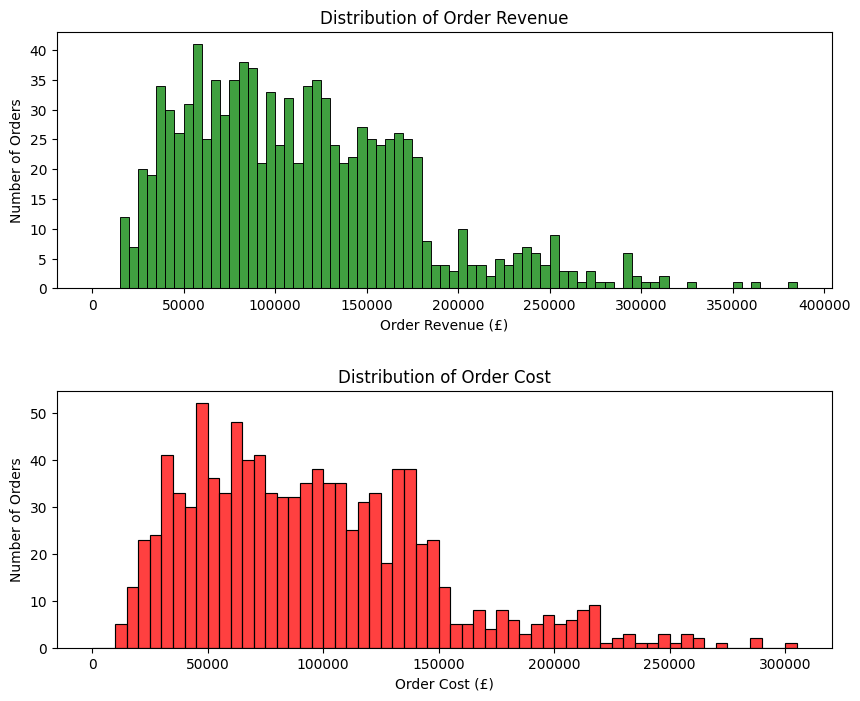

In [83]:
# Create figures and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

sns.histplot(df["revenue"], ax=ax[0], bins=np.arange(0, df["revenue"].max() + 5000, 5000), color="green")
ax[0].set_title("Distribution of Order Revenue")
ax[0].set_ylabel("Number of Orders")
ax[0].set_xlabel("Order Revenue (£)")


sns.histplot(df["cost"], ax=ax[1], bins=np.arange(0, df["cost"].max() + 5000, 5000), color="red")
ax[1].set_title("Distribution of Order Cost")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Order Cost (£)")

# Save visuals
plt.savefig("EDA Visualizations/orders_revenue_cost.png", bbox_inches='tight')

We can see that orders are typically high in value, with most bringing in over £500000 in revenue and costing around the same amount as well.

### Revenue by Country

In [24]:
# Revenue by country
rev_country = df.groupby("country")["revenue"].sum().round().astype(int).sort_values(ascending=False).reset_index()
rev_country

,country,revenue
0,Portugal,27796362
1,France,25900678
2,Sweden,19637204
3,United Kingdom,12115617
4,Finland,5548035
5,Ireland,4952285
6,Bulgaria,3482145
7,Netherlands,3224665
8,Luxembourg,2913550
9,Germany,2794049


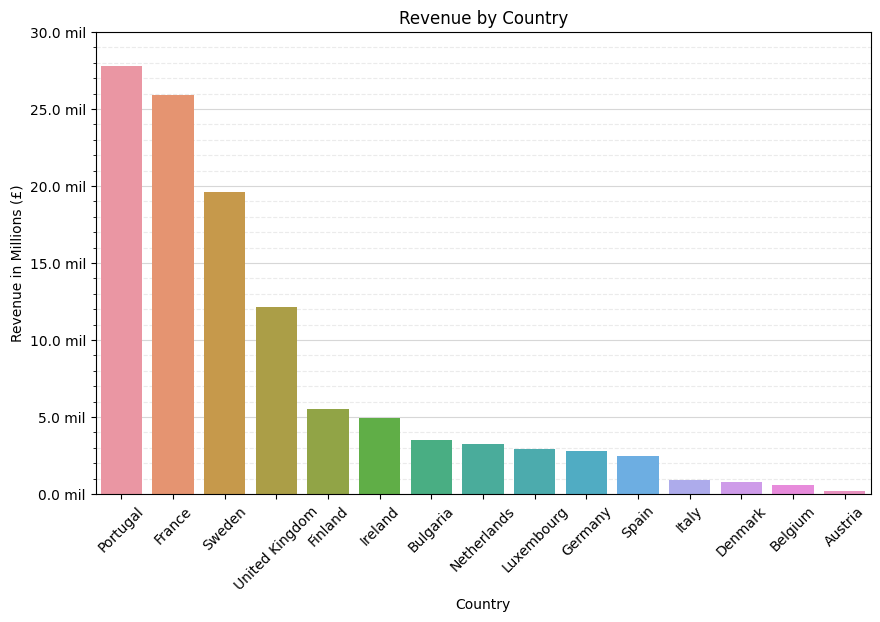

In [84]:
# Create axis and figure
fig, ax = plt.subplots(figsize=(10,6))

# plot
sns.barplot(x="country", y="revenue", data=rev_country)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

# Customize y ticks
ax.set_yticks(np.arange(0, 30000000 + 1, 5000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.1f} mil"))

# Customize xtick labels
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

# Set titles
ax.set_title("Revenue by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Revenue in Millions (£)")

# Save visual
plt.savefig("EDA Visualizations/country_revenue.png", bbox_inches='tight')

We can see that the countries of Portugal and France have generated the most revenue, followed by Sweden and the UK.

### Revenue by Category

In [26]:
# Revenue by Category
rev_cat = df.groupby("category")["revenue"].sum().round().astype(int).sort_values(ascending=False).reset_index()
rev_cat

,category,revenue
0,Clothing,17661682
1,Games,15321623
2,Appliances,15139669
3,Electronics,14482078
4,Books,13179979
5,Beauty,12569064
6,Smartphones,11101655
7,Outdoors,5939075
8,Accessories,4703931
9,Other,3262983


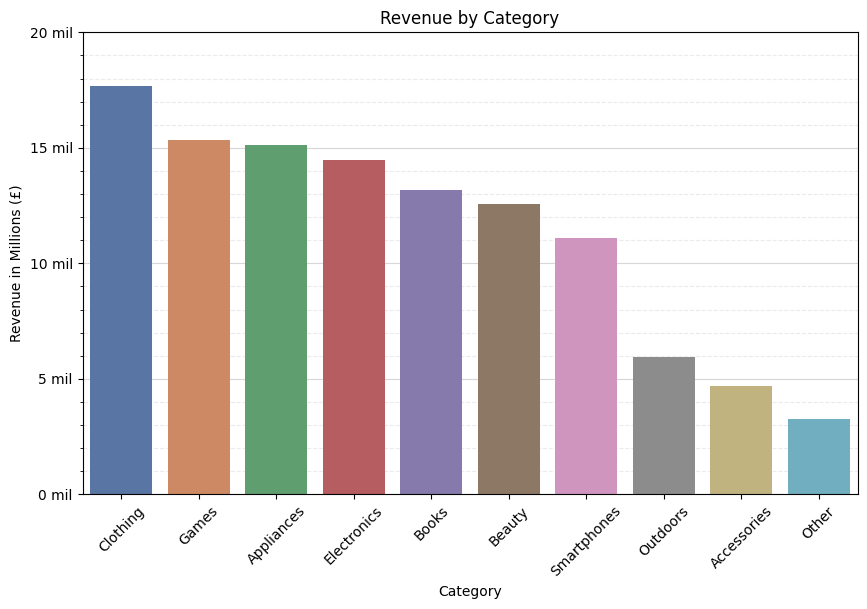

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot
sns.barplot(x="category", y="revenue", data=rev_cat, palette="deep")

# Customize x labels
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

# Customize y ticks
ax.set_yticks(np.arange(0, 20000000 + 1, 5000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.0f} mil"))

# Set titles
ax.set_title("Revenue by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Revenue in Millions (£)")

# Save visual
plt.savefig("EDA Visualizations/category_revenue.png", bbox_inches='tight')

Clothing is the most popular category of products sold, with many other categories having substantial sales as well.

### Revenue by Device Type

In [28]:
# Revenue by type of device
device_rev = df.groupby("device_type")["revenue"].sum().sort_values(ascending=False).round().astype(int).reset_index()
device_rev

,device_type,revenue
0,PC,89647284
1,Mobile,15447394
2,Tablet,8267061


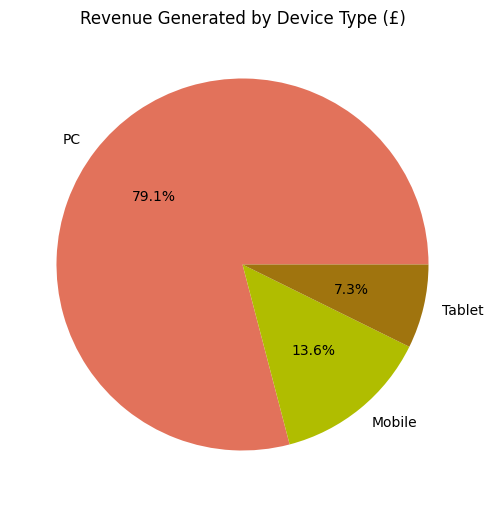

In [87]:
fig, ax = plt.subplots(figsize=(6, 10))

# Create pie chart with custom colors
colors = ["#E2725B", "#B0BD00", "#A0740E"]
ax.pie("revenue", labels="device_type", data=device_rev, colors=colors, autopct='%1.1f%%')

# Add title
ax.set_title("Revenue Generated by Device Type (£)")

# Save visual
plt.savefig("EDA Visualizations/device_revenue.png", bbox_inches='tight')

The vast majority of sales are placed via PC.

### Monthly Revenue Over Time

In [30]:
# Revenue by year and month
grouping_cols = [
    df["order_date"].dt.strftime("%b %Y").rename("month_year"),
    df["order_date"].dt.year.rename("year"), 
    df["order_date"].dt.month.rename("month")]
month_rev = df.groupby(grouping_cols)["revenue"].sum().round().astype(int).reset_index().sort_values(by=["year", "month"])

month_rev

,month_year,year,month,revenue
8,Jan 2019,2019,1,4516615
6,Feb 2019,2019,2,2895564
14,Mar 2019,2019,3,2521828
0,Apr 2019,2019,4,4172237
16,May 2019,2019,5,3825682
12,Jun 2019,2019,6,7692235
10,Jul 2019,2019,7,6638609
2,Aug 2019,2019,8,3437450
22,Sep 2019,2019,9,4870061
20,Oct 2019,2019,10,4372150


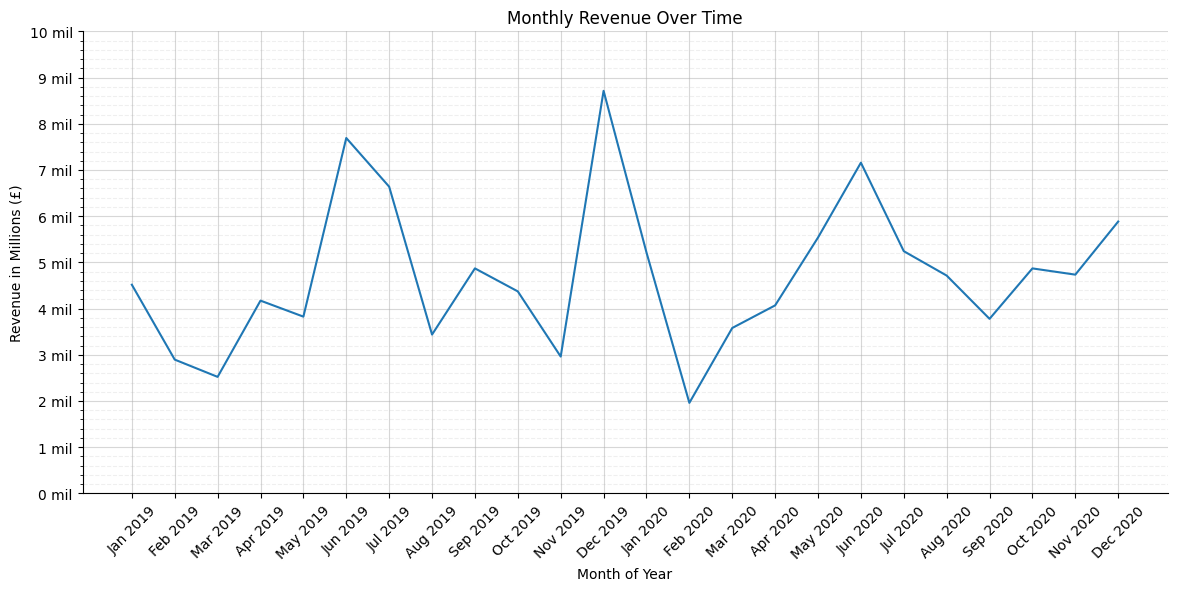

In [91]:
# Line Chart

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot("month_year", "revenue", data=month_rev)

# Customize y ticks
ax.set_yticks(np.arange(0, 10000000 + 1, 1000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.0f} mil"))

# Customize x ticks
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45)

#Customize major grid lines
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="both", linestyle="--", alpha=0.2)
ax.set_axisbelow(True)

# Set titles
ax.set_title("Monthly Revenue Over Time")
ax.set_ylabel("Revenue in Millions (£)")
ax.set_xlabel("Month of Year")

sns.despine()

# Save visual
plt.savefig("EDA Visualizations/revenue_monthly_continuous.png", bbox_inches='tight')

The analysis of sales over time reveals substantial month-to-month fluctuations, peaking in December 2019 and sharply declining in February 2020. Seasonal trends are also evident, with sales rising in spring and summer, falling in fall, and resurging during December's winter holidays before decreasing again in winter months.

### Distribution of Customer Orders Placed

In [32]:
# Count of orders per customer
cust_orders = df["customer_name"].value_counts().reset_index()
cust_orders

,customer_name,count
0,Johns and Sons,142
1,Hessel-Stiedemann,55
2,"Swaniawski, Runolfsson and Green",25
3,"Dickinson, Hyatt and Berge",24
4,"Murray, Reichel and Nolan",23
...,...,...
70,"Parisian, Steuber and Satterfield",2
71,Marquardt-Kuvalis,2
72,Gorczany-Lehner,1
73,Littel-Blick,1


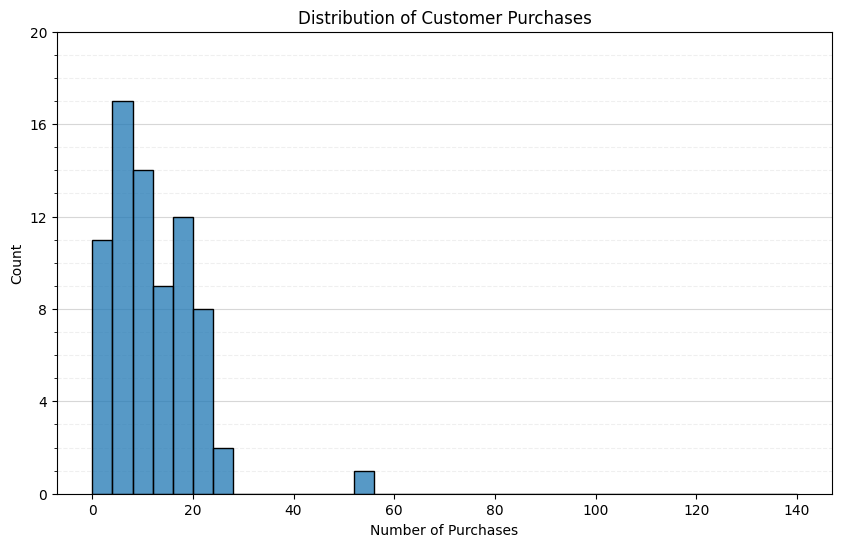

In [92]:
# Histogram of customer order count

# Count of orders
x = cust_orders["count"]

# Custom bins

bins = np.arange(0, x.max() + 1 if x.max() % 2 == 0 else x.max() + 2, 4)

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=x, bins=bins)

# Set x ticks at every other bin edge (intervals of 10)
xticks = bins[::5]
ax.set_xticks(xticks)

# Set y ticks
yticks = np.arange(0, 20 + 1, 4)
ax.set_yticks(yticks)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.2)
ax.set_axisbelow(True)

# Set titles
ax.set_title("Distribution of Customer Purchases")
ax.set_xlabel("Number of Purchases")
ax.set_ylabel("Count")

# Save visual
plt.savefig("EDA Visualizations/customer_purchases_distribution.png", bbox_inches='tight')

We can see that the vast majority of customers completed multiple orders, with the typical number of orders each customer places being around 10-20. We can also see that once customer placed substantial amount of orders, totaling over 50.

### Top Customers by Revenue

In [34]:
# Revenue by Customer
cust_rev = df.groupby("customer_name")["revenue"].sum().rename("revenue_generated")
cust_rev = cust_rev.round().astype("Int64").sort_values(ascending=False).reset_index()

# Get top 25 customers and sort ascending
top_cust = cust_rev.nlargest(25, "revenue_generated").sort_values("revenue_generated").reset_index(drop=True)
top_cust

,customer_name,revenue_generated
0,Smith Group,1810172
1,Hilll-Vandervort,1830659
2,Corwin and Sons,1856068
3,Hegmann Group,1868937
4,Dibbert Inc,1875396
5,McGlynn-Prosacco,1900325
6,"Murray, Reichel and Nolan",1938244
7,"Christiansen, Donnelly and Bechtelar",1948279
8,Kihn Inc,2003259
9,Gislason-Stanton,2010325


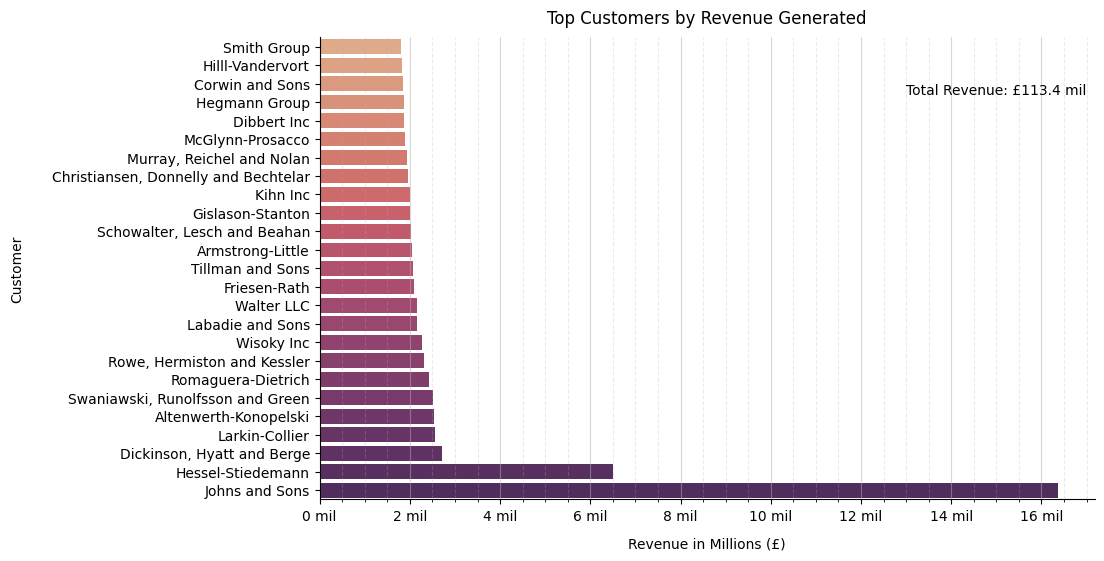

In [94]:
# Create axis
fig, ax = plt.subplots(figsize=(10, 6))

# plot
sns.barplot(x="revenue_generated", y="customer_name", data=top_cust, palette="flare")

# Add total revenue as text
total_rev = cust_rev["revenue_generated"].sum()
ax.text(17000000, 2, f"Total Revenue: £{total_rev / 1000000:.1f} mil",
        horizontalalignment="right", verticalalignment="top")

#Customize major grid lines
ax.grid(which="major", axis="x", linestyle="-", alpha=0.5)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.25)

# Set y ticks as millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000000:.0f} mil"))

# Set titles
ax.set_title("Top Customers by Revenue Generated", pad=10)
ax.set_xlabel("Revenue in Millions (£)", labelpad=10)
ax.set_ylabel("Customer", labelpad=20)

# Remove spines
sns.despine()

# Save visual
plt.savefig("EDA Visualizations/top_customers.png", bbox_inches='tight')

We can see that of our top 25 customers, the top 2 contribute substantially more revenue than the rest. The customer "Johns and Sons" is our most valued customer, contributing over 14% to our total revenue. The other remaining customers all contributed around £2 million.

<a name="marketing-metrics"><a/>

## Calculating Marketing Metrics and KPIs

Now we will look into the success of marketing efforts by generating a report to summarize quarterly marketing metrics. We will look at metrics like new customer generation rate, customer retention rate, revival rate, and churn rate, among others.

This report is generated using an iterative approach, where each metric is generated quarter by quarter, and then converted to a dataframe at the end. This iterative approach allows this code to work properly if the underlying dataframe is updated to contain new quarterly data.

In [36]:
# Create dataframe of customers who made a purchase in a specific quarter
df_quarter = df[["customer_name", "order_date"]]
df_quarter["qyear"] = df_quarter["order_date"].dt.to_period("Q")
df_quarter.drop("order_date", axis=1, inplace=True)
df_quarter.head()

,customer_name,qyear
0,Goldner-Dibbert,2020Q1
1,Hilll-Vandervort,2019Q3
2,Larkin-Collier,2019Q3
3,Hessel-Stiedemann,2020Q2
4,Johns and Sons,2019Q4


In [37]:
# Remove duplicates customers who made more than one purchase in a quarter
df_quarter.drop_duplicates(inplace=True)

In [38]:
# Generate range of years and quarters
y_range = np.arange(df_quarter["qyear"].min().year, df_quarter["qyear"].max().year + 1)
q_range = np.arange(df_quarter["qyear"].min().quarter, df_quarter["qyear"].max().quarter + 1)

# Create a list of qyears to calculate marketing metrics for
qyears = []
for year in y_range:
    for quarter in q_range:
        qyear = f"{year}Q{quarter}"
        qyears.append(qyear)
qyears

['2019Q1',
 '2019Q2',
 '2019Q3',
 '2019Q4',
 '2020Q1',
 '2020Q2',
 '2020Q3',
 '2020Q4']

In [99]:
# Generate report for all qyears

# Initialize lists/Series to store needed metrics/customers
retained_customers = []
retention_rate = []

new_customers = []
gen_rate = []

current_q_active_customers = []
previous_q_active_customers = []
previous_q_inactive_customers = []
current_q_inactive_customers = []
revived_customers = []
revival_rate = []

customers_churned = []
churn_rate = []

all_cust = pd.Series()
total_customers = []

# Iterate through each year of data
for qyear in qyears:
    df_qyear_current = df_quarter[df_quarter["qyear"] == qyear] # Create dataframe of all current period customers
    
    if qyear == "2019Q1": # Handle quarter of existence edge case
        
        new_customers.append(df_qyear_current.shape[0]) # All are new customers
        gen_rate.append(1.0) # Append 1.0 for gen_rate since all are new
        current_q_active_customers.append(df_qyear_current.shape[0]) # Calculate active customers
        
        retained_customers.append(0)
        retention_rate.append(0)
        
        previous_q_active_customers.append(0) # Remaining numbers are 0
        current_q_inactive_customers.append(0) 
        previous_q_inactive_customers.append(0)
        revived_customers.append(0)
        revival_rate.append(0)
        customers_churned.append(0)
        churn_rate.append(0)
        
        # Add all customers to running list of customers and running count of customers
        all_cust = pd.concat([all_cust, df_qyear_current["customer_name"]], ignore_index=True)
        total_customers.append(all_cust.count())
        
    else: # Handle all other cases
        # Determine prior period
        if qyear[-1] == "1": # Handle Q1 edge case
            prior_year = str(int(qyear[:4]) - 1)
            prior_quarter = "Q4"
        else:
            prior_quarter = "Q" + str(int(qyear[-1]) - 1)
            prior_year = str(qyear[:4])

        qyear_prior = prior_year + prior_quarter # Concatenate prior year and quarter to store date in YYYYQQ form
        df_qyear_prior = df_quarter[df_quarter["qyear"] == qyear_prior] # Create dataframe of all prior period customers
        
        # Create a series storing current quarter customers
        prior_cust= df_qyear_prior["customer_name"]
        
        # Create a series storing prior quarter customers
        current_cust = df_qyear_current["customer_name"]
        
        # Update previous quarter active customers
        previous_active_cust_count = current_q_active_customers[-1]
        previous_q_active_customers.append(previous_active_cust_count)
        
        # Update current quarter active customers
        current_q_active_customers.append(current_cust.count())

        # Update new customers list
        new_cust_q = current_cust[~current_cust.isin(all_cust)]
        new_customers.append(new_cust_q.count())

        # Customer generation rate
        cust_gen_q = round((new_cust_q.count() / current_cust.count()) if current_cust.count() != 0 else 0, 4)
        gen_rate.append(cust_gen_q)

        # Retained customers
        cust_retained_q = prior_cust.isin(current_cust).sum() # Inner join to filter for retained
        retained_customers.append(cust_retained_q)

        # Retention rate
        ret_rate_q = round(((cust_retained_q / previous_active_cust_count) if previous_active_cust_count != 0 else 0), 4)
        retention_rate.append(ret_rate_q)
        
        # Customers churned
        cust_churned_q = (~prior_cust.isin(current_cust)).sum()
        customers_churned.append(cust_churned_q)
        
        # Churn rate
        churn_rate_q = round((cust_churned_q / prior_cust.count()) if prior_cust.count() != 0 else 0, 4)
        churn_rate.append(churn_rate_q)

        # Revived customers
        rev_cust_q = (~current_cust.isin(prior_cust) & current_cust.isin(all_cust)).sum()
        revived_customers.append(rev_cust_q)
        
        # Inactive customers for previous quarter
        inactive_cust_prev_q = current_q_inactive_customers[-1]
        previous_q_inactive_customers.append(inactive_cust_prev_q)

        # Inactive customers for current quarter
        inactive_cust_q = (~all_cust.isin(current_cust)).sum()
        current_q_inactive_customers.append(inactive_cust_q)
        
        # Revival rate
        revival_rate_q = round((rev_cust_q / inactive_cust_prev_q) if inactive_cust_prev_q !=0 else 0, 4)
        revival_rate.append(revival_rate_q)
        
        # Update all_cust and total_customers
        all_cust = pd.concat([all_cust, new_cust_q], ignore_index=True)
        total_customers.append(all_cust.count())

# Summarize results in dataframe
marketing_metrics_df = pd.DataFrame({
    "Quarter of Year": qyears,
    "Current Quarter Active Customers": current_q_active_customers,
    "New Customers": new_customers,
    "Generation Rate": gen_rate,
    "Previous Quarter Active Customers": previous_q_active_customers,
    "Retained Customers": retained_customers,
    "Retention Rate": retention_rate,
    "Customers Churned": customers_churned,
    "Churn Rate": churn_rate,
    "Current Quarter Inactive Customers": current_q_inactive_customers,
    "Previous Quarter Inactive Customers": previous_q_inactive_customers,
    "Revived Customers": revived_customers,
    "Revival Rate": revival_rate,
    "Historical Customer Count": total_customers
})

# View results
marketing_metrics_df

,Quarter of Year,Current Quarter Active Customers,New Customers,Generation Rate,Previous Quarter Active Customers,Retained Customers,Retention Rate,Customers Churned,Churn Rate,Current Quarter Inactive Customers,Previous Quarter Inactive Customers,Revived Customers,Revival Rate,Historical Customer Count
0,2019Q1,51,51,1.0000,0,0,0.0000,0,0.0000,0,0,0,0.0000,51
1,2019Q2,51,13,0.2549,51,38,0.7451,13,0.2549,13,0,0,0.0000,64
2,2019Q3,47,3,0.0638,51,37,0.7255,14,0.2745,20,13,7,0.5385,67
3,2019Q4,53,6,0.1132,47,39,0.8298,8,0.1702,20,20,8,0.4000,73
4,2020Q1,52,2,0.0385,53,42,0.7925,11,0.2075,23,20,8,0.4000,75
5,2020Q2,54,0,0.0000,52,41,0.7885,11,0.2115,21,23,13,0.5652,75
6,2020Q3,52,0,0.0000,54,41,0.7593,13,0.2407,23,21,11,0.5238,75
7,2020Q4,49,0,0.0000,52,35,0.6731,17,0.3269,26,23,14,0.6087,75


In [100]:
# Pivot rows and columns

# Store data as strings to allow for pivoting
marketing_metrics_pivot = marketing_metrics_df[marketing_metrics_df.columns].astype(str)

# Set qyear as index
marketing_metrics_pivot = marketing_metrics_pivot.set_index("Quarter of Year")

# Pivot qyear to columns and metrics to index/rows
marketing_metrics_pivot = marketing_metrics_pivot.T

# View results
marketing_metrics_pivot

Quarter of Year,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
Current Quarter Active Customers,51,51,47,53,52,54,52,49
New Customers,51,13,3,6,2,0,0,0
Generation Rate,1.0,0.2549,0.0638,0.1132,0.0385,0.0,0.0,0.0
Previous Quarter Active Customers,0,51,51,47,53,52,54,52
Retained Customers,0,38,37,39,42,41,41,35
Retention Rate,0.0,0.7451,0.7255,0.8298,0.7925,0.7885,0.7593,0.6731
Customers Churned,0,13,14,8,11,11,13,17
Churn Rate,0.0,0.2549,0.2745,0.1702,0.2075,0.2115,0.2407,0.3269
Current Quarter Inactive Customers,0,13,20,20,23,21,23,26
Previous Quarter Inactive Customers,0,0,13,20,20,23,21,23


<div style="text-align: right">
  <a href="https://github.com/weismanm12/retailer-eda-and-marketing-kpis/blob/main/marketing_metrics_descriptions_and_dictionary.csv" target="_blank">Marketing Metrics Descriptions and Dictionary</a>
</div>

### Marketing Metrics Summary Report
This report provides an in-depth overview of the marketing metrics for an online retailer across multiple quarters. These metrics offer valuable insights into customer activity, retention, churn, and other key performance indicators that contribute to the retailer's success.

#### 1. Active Customers (Current Quarter):
The number of active customers remained consistent over the observation periods. The highest count was recorded in 2019Q4 with 53 customers, while the lowest count was in 2019Q3 with 47 customers.

#### 2. Retained Customers and Retention Rate:
Retained customer numbers varied across quarters, ranging from 37 in 2019Q3 to 42 in 2020Q1. The retention rate, indicating the proportion of retained customers, exhibited a positive trend, peaking at 80.77% in 2020Q1.

#### 3. New Customers and Generation Rate:
New customer acquisition displayed fluctuations, with the highest count of 51 new customers in 2019Q1. The generation rate, which measures the proportion of new customers, mirrored these fluctuations, dropping to 0% in 2020Q2 and subsequent quarters due to no new customer additions.

#### 4. Inactive and Revived Customers (Current Quarter):
The number of inactive customers showed variations, with a peak of 26 in 2020Q4. Conversely, the count of revived customers increased over time, reaching its zenith at 14 in 2020Q4.

#### 5. Revival Rate:
The revival rate, denoting the proportion of customers revived from inactivity, demonstrated fluctuations across quarters. The rate ranged from 0.35 in 2019Q3 to 0.619 in 2020Q2.

#### 6. Customers Churned and Churn Rate:
The count of churned customers exhibited fluctuations, reaching a peak of 17 in 2020Q4. The churn rate, representing the proportion of customers lost, fluctuated between 0.17 in 2019Q4 and 0.3269 in 2020Q4.

<br>

#### Summary:
In summary, the online retailer's customer base remained stable over the observation period. Initiatives aimed at retaining and reviving customers yielded positive outcomes, as indicated by improved retention and revival rates. Churn rates experienced fluctuations, with the highest churn rate recorded in 2020Q4, however the high revival rates indicate that these customers often return in the quarter. New customer acquisition varied, with a decline in 2020Q2 that is yet to be recovered, indicating that more emphasis on customer acquisition marketing may be needed.

Collectively, these metrics offer valuable insights into the retailer's customer engagement and retention strategies.